In [93]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from qutip import *
import laser

%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser

from matplotlib import rc
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
np.set_printoptions(threshold='nan', precision=6, suppress=True)

# Equation of Motion for the Density Matrix of the Cavity Field

For $\rho_{nm}$, we have

$$
\begin{aligned}
\dot{\rho}_{nm} =
&- \frac{M_{nm}A}{1 + N_{nm}B/A} \rho_{nm} + \frac{\sqrt{nm}A}{1 + N_{n-1,m-1}B/A} \rho_{n-1,m-1} \\
&- \frac{C}{2}(n+m)\rho_{nm} + C\sqrt{(n+1)(m+1)} \rho_{n+1, m+1}
\end{aligned}
$$

where
$$
\begin{aligned}
A &= \frac{2r_a g^2}{\gamma^2},\\
B &= \frac{4g^2}{\gamma^2} A,\\
M_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{8A},\\
N_{nm} &= \frac{1}{2}(n+m+2) + (n-m)^2\frac{B}{16A}.
\end{aligned}
$$

In particular, for diagonal elements, we have

$$
\begin{aligned}
\dot{p}(n) =
&- \frac{(n+1)A}{1 + (n+1)B/A} p(n) + \frac{nA}{1 + nB/A} p(n-1) \\
&- Cnp(n) + C(n+1)p(n+1)
\end{aligned}
$$

**Parematers**

In [94]:
# parameters
w_c = 2.0 * np.pi
w_a = 2.0 * np.pi
g = 0.001

gamma = 0.01
kappa = 0.01

**Initial state of the cavity field: $\psi_0 = \lvert 0 \rangle$**

In [95]:
# initial cavity state
N_max = 50
n_list = np.arange(N_max)
init_psi = fock(N_max, 0)

## 1. 20% above threshold

- A = 0.012
- B = 0.0048
- C = 0.01

In [96]:
ra = 0.6 # pumping rate
lp = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa) # create laser object

In [97]:
lp.get_abc() # master equation parameters

{'A': 0.011999999999999999, 'B': 0.0004799999999999999, 'C': 0.01}

In [98]:
# list of time for ode
t_list = 0.1 * 2 * np.pi / w_c * np.arange(20000)
# state evolution
lp.pn_evolve(init_psi, N_max, t_list)

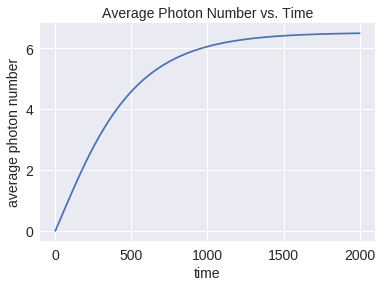

In [104]:
# plot average photon numbers vs. time
lp.plot_n_vs_time();

In [102]:
lp.calc_entropy()

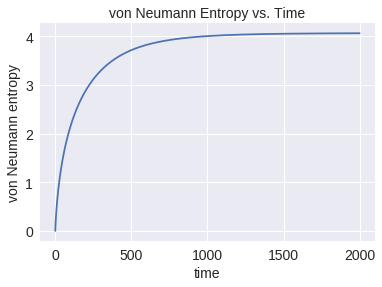

In [103]:
lp.plot_entropy_vs_time();

## 2. At the threshold

- A = 0.01
- B = 0.004
- C = 0.01

In [105]:
ra = 0.5
la = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [106]:
la.get_abc()

{'A': 0.009999999999999998, 'B': 0.0003999999999999999, 'C': 0.01}

In [107]:
# list of time for ode
t_list = 0.1 * 2 * np.pi / w_c * np.arange(20000)
# evolution
la.pn_evolve(init_psi, N_max, t_list)

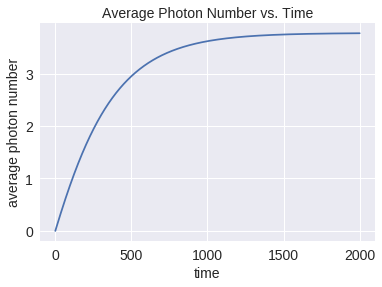

In [108]:
la.plot_n_vs_time();

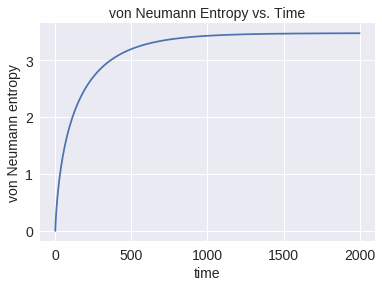

In [110]:
la.calc_entropy()
la.plot_entropy_vs_time();

## 3. 20% below threshold

- A = 0.08
- B = 0.0032
- C = 0.01

In [111]:
ra = 0.4
lm = laser.LaserOneMode(w_c, w_a, g, ra, gamma, kappa)

In [112]:
lm.get_abc()

{'A': 0.007999999999999998, 'B': 0.0003199999999999999, 'C': 0.01}

In [113]:
# list of time for ode
t_list = 0.05 * 2 * np.pi / w_c * np.arange(40000)
# evolution
lm.pn_evolve(init_psi, N_max, t_list)

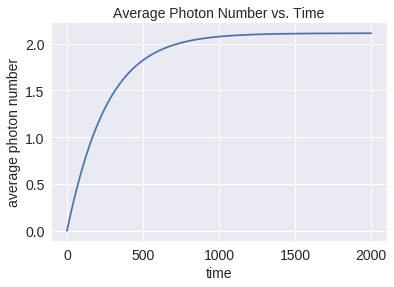

In [114]:
lm.plot_n_vs_time();

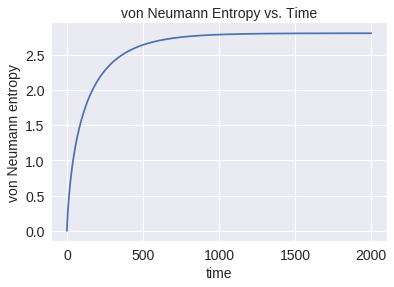

In [115]:
lm.calc_entropy()
lm.plot_entropy_vs_time();